In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
%config InlineBackend.figure_format = 'svg'

# Basic EDA

In [3]:
# All subtasks using the same text data
train_df_1 = pd.read_csv("../dev_phase/subtask1/train/arb.csv")
train_df_2 = pd.read_csv("../dev_phase/subtask2/train/arb.csv")
train_df_3 = pd.read_csv("../dev_phase/subtask3/train/arb.csv")
dev_df = pd.read_csv("../dev_phase/subtask1/dev/arb.csv")

# Subtask 1

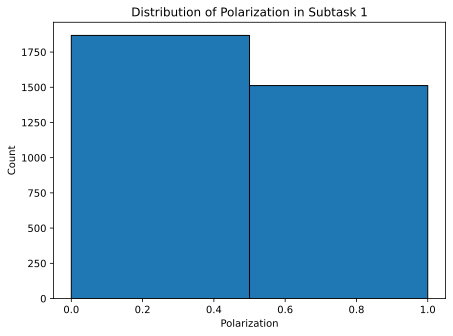

In [4]:
plt.hist(train_df_1["polarization"], bins=len(train_df_1["polarization"].unique()), edgecolor='black')
plt.title("Distribution of Polarization in Subtask 1")
plt.xlabel("Polarization")
plt.ylabel("Count")
plt.tight_layout()
# save as pdf in figures/arb
plt.savefig("figures/arb/subtask1_polarization_distribution.pdf")
plt.show()

# Subtask 2

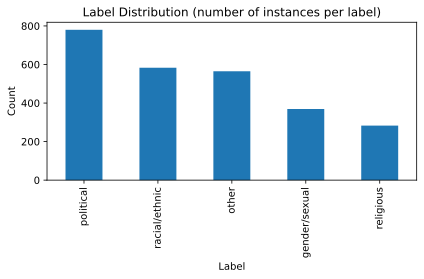

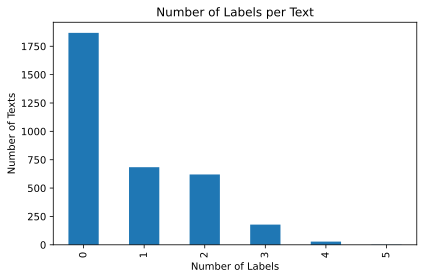

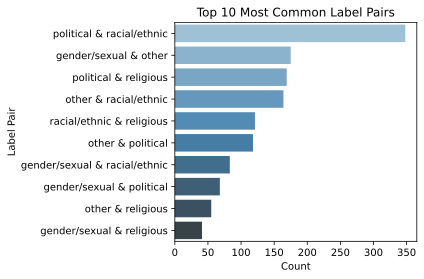

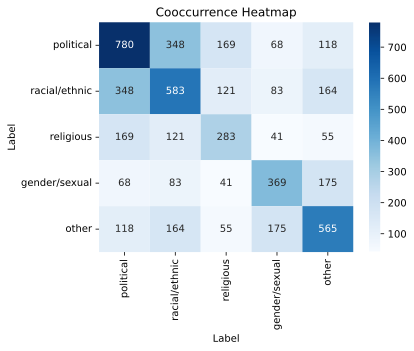

In [ ]:
import itertools
import seaborn as sns

# List of label columns
label_cols = train_df_2.columns[2:]

# Prepare data for plotting
label_counts = train_df_2[label_cols].sum().sort_values(ascending=False)

num_labels_per_text = train_df_2[label_cols].sum(axis=1)
num_labels_value_counts = num_labels_per_text.value_counts().sort_index()

pair_counts = {}
for labels in train_df_2[label_cols].values:
    active = [label_cols[i] for i, v in enumerate(labels) if v]
    for pair in itertools.combinations(sorted(active), 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_counts_sorted = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
top_n = 10
top_pairs = pair_counts_sorted[:top_n]
pairs = [' & '.join(pair) for pair, _ in top_pairs]
counts = [count for _, count in top_pairs]

cooccurrence_matrix = np.zeros((len(label_cols), len(label_cols)), dtype=int)
for labels in train_df_2[label_cols].values:
    active_idx = [i for i, v in enumerate(labels) if v]
    for i in active_idx:
        for j in active_idx:
            cooccurrence_matrix[i, j] += 1

# 1. Label distribution (bar chart)
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title("Label Distribution (number of instances per label)")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.savefig("figures/arb/subtask2_label_distribution.pdf")
plt.show()

# 2. Number of labels per text
plt.figure(figsize=(6, 4))
num_labels_value_counts.plot(kind='bar')
plt.title("Number of Labels per Text")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Texts")
plt.tight_layout()
plt.savefig("figures/arb/subtask2_num_labels_per_text.pdf")
plt.show()

# 3. Most common label pairs (sorted)
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=pairs, hue=pairs, palette="Blues_d", legend=False)
plt.title("Top 10 Most Common Label Pairs")
plt.xlabel("Count")
plt.ylabel("Label Pair")
plt.tight_layout()
plt.savefig("figures/arb/subtask2_top10_label_pairs.pdf")
plt.show()

# 4. Cooccurrence heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cooccurrence_matrix,
    xticklabels=label_cols,
    yticklabels=label_cols,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Cooccurrence Heatmap")
plt.xlabel("Label")
plt.ylabel("Label")
plt.savefig("figures/arb/subtask2_cooccurrence_heatmap.pdf")
plt.show()

# Subtask 3

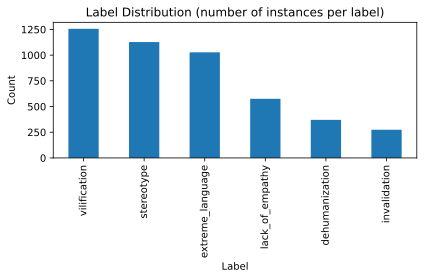

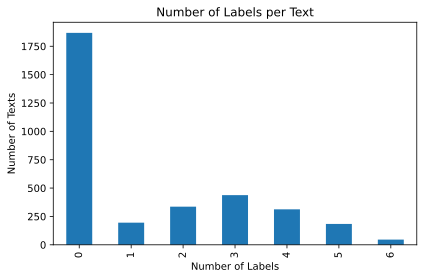

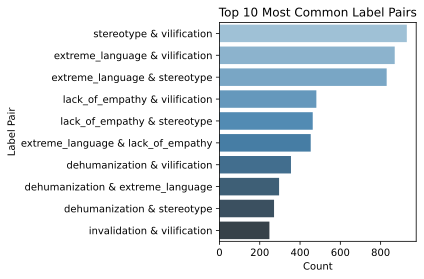

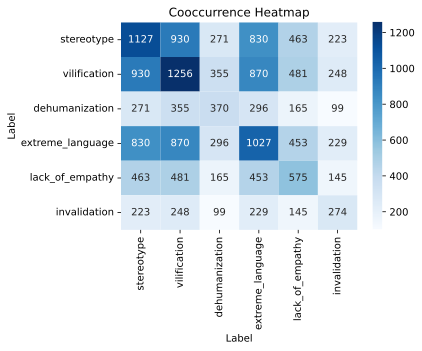

In [14]:
import itertools
import seaborn as sns

# List of label columns
label_cols = train_df_3.columns[2:]

# Prepare data for plotting
label_counts = train_df_3[label_cols].sum().sort_values(ascending=False)

num_labels_per_text = train_df_3[label_cols].sum(axis=1)
num_labels_value_counts = num_labels_per_text.value_counts().sort_index()

pair_counts = {}
for labels in train_df_3[label_cols].values:
    active = [label_cols[i] for i, v in enumerate(labels) if v]
    for pair in itertools.combinations(sorted(active), 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_counts_sorted = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
top_n = 10
top_pairs = pair_counts_sorted[:top_n]
pairs = [' & '.join(pair) for pair, _ in top_pairs]
counts = [count for _, count in top_pairs]

cooccurrence_matrix = np.zeros((len(label_cols), len(label_cols)), dtype=int)
for labels in train_df_3[label_cols].values:
    active_idx = [i for i, v in enumerate(labels) if v]
    for i in active_idx:
        for j in active_idx:
            cooccurrence_matrix[i, j] += 1

# 1. Label distribution (bar chart)
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title("Label Distribution (number of instances per label)")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.savefig("figures/arb/subtask3_label_distribution.pdf")
plt.show()

# 2. Number of labels per text
plt.figure(figsize=(6, 4))
num_labels_value_counts.plot(kind='bar')
plt.title("Number of Labels per Text")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Texts")
plt.tight_layout()
plt.savefig("figures/arb/subtask3_num_labels_per_text.pdf")
plt.show()

# 3. Most common label pairs (sorted)
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=pairs, hue=pairs, palette="Blues_d", legend=False)
plt.title("Top 10 Most Common Label Pairs")
plt.xlabel("Count")
plt.ylabel("Label Pair")
plt.tight_layout()
plt.savefig("figures/arb/subtask3_label_pairs.pdf")
plt.show()

# 4. Cooccurrence heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cooccurrence_matrix,
    xticklabels=label_cols,
    yticklabels=label_cols,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Cooccurrence Heatmap")
plt.xlabel("Label")
plt.ylabel("Label")
plt.tight_layout()
plt.savefig("figures/arb/subtask3_cooccurrence_heatmap.pdf")
plt.show()

# Analysis of Arabic Texts

## ALDi

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model_name = "AMR-KELEG/Sentence-ALDi-50"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
device = "mps"
model.to(device)

def compute_aldi_score(sentence):
    inputs = tokenizer(sentence, return_tensors="pt")
    inputs.to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    return min(max(0, logits[0][0].item()), 1)

texts = train_df_1["text"]
ALDi_scores = []

for text in tqdm(texts):
    ALDi_scores.append(compute_aldi_score(text))

  0%|          | 0/3380 [00:00<?, ?it/s]

In [8]:
train_df_1["ALDi_score"] = ALDi_scores
# Explore 10 examples with least ALDI (using index)
least_aldi_texts = texts.iloc[np.argsort(ALDi_scores)[:10]]

print("Texts with least ALDI scores:")
for i, text in enumerate(least_aldi_texts, 1):
    print(text)

print("-" * 50)
top_aldi_texts = texts.iloc[np.argsort(ALDi_scores)[-10:]]

print("Texts with highest ALDI scores:")
for i, text in enumerate(top_aldi_texts, 1):
    print(text)

print("-" * 50)
# Find 10 texts in the middle like (0.4-0.6), print text : score
ALDi_scores_np = np.array(ALDi_scores)
middle_mask = (ALDi_scores_np >= 0.4) & (ALDi_scores_np <= 0.6)
middle_indices = np.where(middle_mask)[10:30]
middle_aldi_texts = texts.iloc[middle_indices]
middle_aldi_scores = ALDi_scores_np[middle_indices]
for text, score in zip(middle_aldi_texts, middle_aldi_scores):
    print(f"Text: {text}\nScore: {score}\n")
    print("")

Texts with least ALDI scores:
تغطية صحفية: طائرات الاحتلال تشن هجوما جوياً واسعاً على سوريا بالتزامن مع توغل بري بين محافظتي درعا والقنيطرة جنوب البلاد
#أردوغان: دافعنا بشجاعة عن القضية الفلسطينية وأبناء #غزة الأبطال، وأينما وُجد اضطهاد أو صراع أو ظلم سنكون هناك لإنهائه
الناطق العسكري باسم أنصار الله: قررنا استئناف حظر إبحار السفن الإسرائيلية بالبحرين الأحمر والعربي وباب المندب، ويستمر هذا الحظر حتى فتح معابر قطاع #غزة ودخول احتياجاته من غذاء ودواء
الماسونية لا تعتبر منظمة تجارية، ولكن العديد من الماسونيين المشهورين كانوا رؤساء شركات أو مؤسسين لبعض الشركات البارزة
تغليظ عقوبة ختان الإناث للسجن المشدد..وتطورات محاولة تعويم السفينة الجانحة..وهذا جدول تشغيل مترو الأنفاق خلال شهر رمضان
رغم حظره بشكل رسمي في مصر عام 2008 إلا للضرورة الطبية، لا يزال ختان الإناث يمارس على نطاق واسع، وتتراوح عقوبته بين السجن ثلاثة أشهر وسنتين
#السودان يصادق على قانون يجرّم #ختان_الإناث
ختان الإناث يلحق أضرارا بأكثر من 230 مليون فتاة، ودعوة أممية للقضاء عليه
اختطاف الحكومة الألمانية لأطفال من عائلة مسلمة ترفض ت

coef: 1.4077098306040705
intercept: -0.7158446584919996


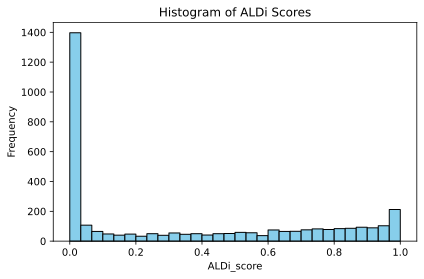

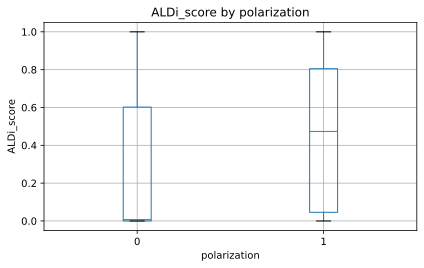

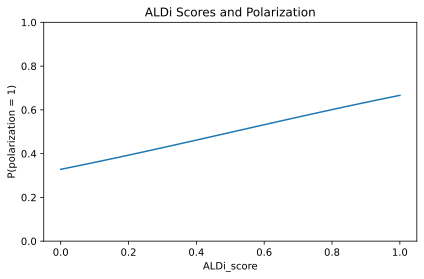

In [9]:
from sklearn.linear_model import LogisticRegression

X = train_df_1[["ALDi_score"]].values
y = train_df_1["polarization"].values

clf = LogisticRegression()
clf.fit(X, y)

coef = clf.coef_[0][0]
intercept = clf.intercept_[0]

print("coef:", coef)
print("intercept:", intercept)

aldi_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
probs = clf.predict_proba(aldi_grid)[:, 1]

# Histogram of ALDi scores
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.hist(train_df_1["ALDi_score"], bins=30, color="skyblue", edgecolor="black")
ax1.set_title("Histogram of ALDi Scores")
ax1.set_xlabel("ALDi_score")
ax1.set_ylabel("Frequency")
fig1.tight_layout()
fig1.savefig("figures/arb/aldi_histogram.pdf")
plt.show()

# Boxplot of ALDi_score by polarization
fig2, ax2 = plt.subplots(figsize=(6, 4))
train_df_1.boxplot(column="ALDi_score", by="polarization", ax=ax2)
ax2.set_title("ALDi_score by polarization")
ax2.set_xlabel("polarization")
ax2.set_ylabel("ALDi_score")
plt.suptitle("")
fig2.tight_layout()
fig2.savefig("figures/arb/aldi_boxplot.pdf")
plt.show()

# Logistic regression probability curve
fig3, ax3 = plt.subplots(figsize=(6, 4))
ax3.plot(aldi_grid, probs)
ax3.set_xlabel("ALDi_score")
ax3.set_ylabel("P(polarization = 1)")
ax3.set_title("ALDi Scores and Polarization")
ax3.set_ylim(0, 1)
fig3.tight_layout()
fig3.savefig("figures/arb/aldi_logistic_regression.pdf")
plt.show()

## NADI

In [10]:
DIALECTS = [
    "Algeria",
    "Bahrain",
    "Egypt",
    "Iraq",
    "Jordan",
    "Kuwait",
    "Lebanon",
    "Libya",
    "Morocco",
    "Oman",
    "Palestine",
    "Qatar",
    "Saudi_Arabia",
    "Sudan",
    "Syria",
    "Tunisia",
    "UAE",
    "Yemen",
]
DIALECT_to_region = {
    "Algeria": "Maghrebi",
    "Libya": "Maghrebi",
    "Morocco": "Maghrebi",
    "Tunisia": "Maghrebi",
    "Egypt": "Egyptian",
    "Iraq": "Iraqi",
    "Jordan": "Levantine",
    "Lebanon": "Levantine",
    "Palestine": "Levantine",
    "Syria": "Levantine",
    "Bahrain": "Gulf",
    "Kuwait": "Gulf",
    "Oman": "Gulf",
    "Qatar": "Gulf",
    "Saudi_Arabia": "Gulf",
    "UAE": "Gulf",
    "Yemen": "Gulf",
    "Sudan": "Sudan"
}
assert len(DIALECTS) == 18

MODEL_NAME = "AMR-KELEG/NADI2024-baseline"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(device)

def predict_nadi(text, verbose=False):
    inputs = tokenizer(text, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        logits = model(**inputs).logits

    probs = torch.softmax(logits, dim=1).flatten()

    region_scores = {}
    for i, p in enumerate(probs):
        dialect = DIALECTS[i]
        region = DIALECT_to_region[dialect]
        prob = p.item()
        # keep the max probability per region
        if region not in region_scores or prob > region_scores[region]:
            region_scores[region] = prob

    return region_scores

In [11]:
import torch
train_df_1["nadi"] = [
    predict_nadi(x)
    for x in tqdm(train_df_1["text"], total=len(train_df_1), desc="Predicting nadi")
]
# extract actual predicted value for each region to new columns
train_df_1["Gulf"] = train_df_1["nadi"].apply(lambda x: x.get("Gulf", 0))
train_df_1["Egyptian"] = train_df_1["nadi"].apply(lambda x: x.get("Egyptian", 0))
train_df_1["Levantine"] = train_df_1["nadi"].apply(lambda x: x.get("Levantine", 0))
train_df_1["Iraqi"] = train_df_1["nadi"].apply(lambda x: x.get("Iraqi", 0))
train_df_1["Maghrebi"] = train_df_1["nadi"].apply(lambda x: x.get("Maghrebi", 0))
train_df_1["Sudan"] = train_df_1["nadi"].apply(lambda x: x.get("Sudan", 0))
# drop train_df_1["nadi"] column
train_df_1 = train_df_1.drop(columns=["nadi"])

Predicting nadi:   0%|          | 0/3380 [00:00<?, ?it/s]

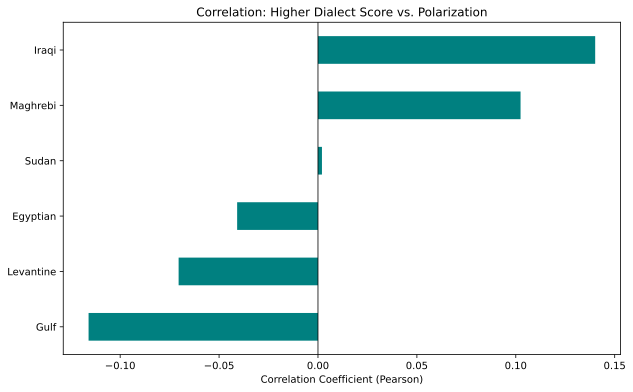

In [12]:
dialect_cols = list(set(DIALECT_to_region.values()))
correlations = train_df_1[dialect_cols].corrwith(train_df_1['polarization'])

# Plot
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='teal')
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Correlation: Higher Dialect Score vs. Polarization")
plt.xlabel("Correlation Coefficient (Pearson)")
plt.savefig("figures/arb/nadi_correlation.pdf")
plt.show()

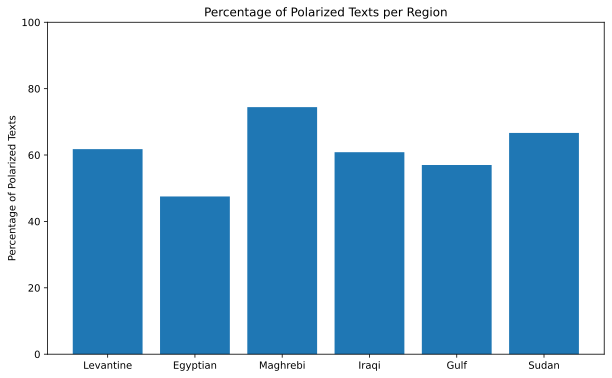

In [13]:
threshold_nadi = 0.4 # adjust as you like
threshold_aldi = 0.4 # adjust as you like

polarization_percentages = []

for region in dialect_cols:
    mask = train_df_1[region] >= threshold_nadi
    # mask also if aldi >= 0.5 only
    mask = mask & (train_df_1["ALDi_score"] >= threshold_aldi)
    n_region = mask.sum()
    if n_region == 0:
        pct = 0.0
    else:
        pct = 100 * train_df_1.loc[mask, "polarization"].mean()
    polarization_percentages.append(pct)

plt.figure(figsize=(10, 6))
plt.bar(dialect_cols, polarization_percentages)
plt.ylabel("Percentage of Polarized Texts")
plt.title(f"Percentage of Polarized Texts per Region")
plt.ylim(0, 100)
plt.savefig("figures/arb/nadi_percentage_of_polarized_texts.pdf")
plt.show()